<a href="https://colab.research.google.com/github/camohammedyousuf077-boop/Least-squares-sales-prediction-model/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

from google.colab import files
uploaded = files.upload()  # Select the dataset file from your computer

Enter all years separated by commas: 2012, 2013, 2014
Enter corresponding sales values separated by commas: 344, 788, 788

Equation: Yc = 640.00 + (222.00)X
Forecast for 2015: 1084.00
Forecast for 2016: 1306.00
Forecast for 2017: 1528.00


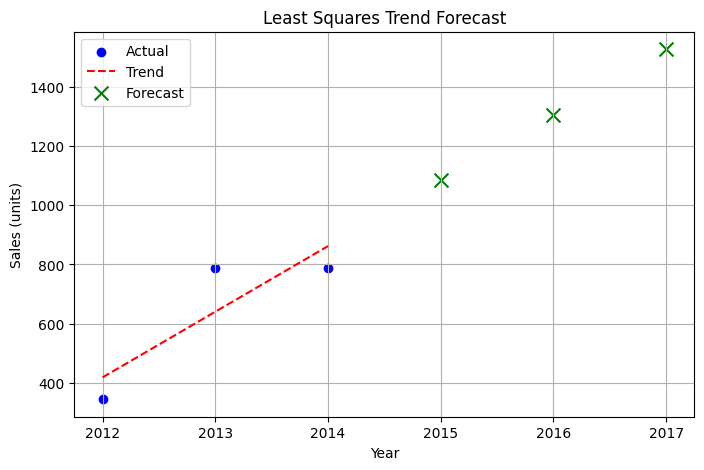

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LeastSquaresTrend:
    def __init__(self, years, sales):
        self.years = np.array(years, dtype=float)
        self.sales = np.array(sales, dtype=float)
        self.N = len(years)

        # Center X values around 0
        mid = (self.N - 1) / 2
        self.X = np.arange(-mid, mid + 1)

        # Compute coefficients
        self.a = np.sum(self.sales) / self.N
        self.b = np.sum(self.X * self.sales) / np.sum(self.X ** 2)

    def predict_next(self, n_years=1):
        """
        Predict the next n_years based on trend.
        """
        last_year = int(self.years[-1])
        future_years = np.arange(last_year + 1, last_year + n_years + 1)
        base_year = self.years[0]
        offset_years = future_years - base_year
        mid = (self.N - 1) / 2
        X_new = offset_years - mid
        predictions = self.a + self.b * X_new
        return future_years, predictions

    def plot(self, n_future=1):
        trend_values = self.a + self.b * self.X

        plt.figure(figsize=(8,5))
        plt.scatter(self.years, self.sales, color='blue', label='Actual')
        plt.plot(self.years, trend_values, 'r--', label='Trend')

        if n_future > 0:
            future_years, future_preds = self.predict_next(n_future)
            plt.scatter(future_years, future_preds, color='green', marker='x', s=100, label='Forecast')

        plt.xlabel("Year")
        plt.ylabel("Sales (units)")
        plt.title("Least Squares Trend Forecast")
        plt.legend()
        plt.grid(True)
        plt.show()


# ---------------- Interactive Input ----------------
years_input = input("Enter all years separated by commas: ")
sales_input = input("Enter corresponding sales values separated by commas: ")

try:
    years = [int(y.strip()) for y in years_input.split(',')]
    sales = [float(s.strip()) for s in sales_input.split(',')]
except:
    print("Invalid input. Make sure years and sales are numbers separated by commas.")
    exit()

model = LeastSquaresTrend(years, sales)

print("\nEquation: Yc = {:.2f} + ({:.2f})X".format(model.a, model.b))

# Automatically predict next 3 years (you can change n_future)
n_future = 3
future_years, forecast = model.predict_next(n_future)
for y, f in zip(future_years, forecast):
    print(f"Forecast for {y}: {f:.2f}")

# Plot actual, trend, and future forecast
model.plot(n_future=n_future)